# Bio Signal for Smoking

## Import Libraries

In [1]:
import numpy as np
from numpy import random
import pandas as pd
import os
from numpy.linalg import inv
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis
import matplotlib
from matplotlib import pyplot as  plt
import seaborn as sns
%matplotlib inline
from scipy.stats import binom
pd.set_option('Display.max_columns',None)
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chisquare,chi2,chi2_contingency
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV,Ridge,RidgeCV
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix


## Import Dataset

In [2]:
df = pd.read_csv('assets\smoking.csv')

## Basic info about Dataset

In [3]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [5]:
df.shape

(55692, 27)

In [6]:
df[['gender', 'oral', 'tartar']]


,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
55687,F,Y,Y
55688,F,Y,Y
55689,F,Y,N
55690,M,Y,N


## Binary Encoding

In [7]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['oral'] = df['oral'].map({'Y': 1, 'N': 0})
df['tartar'] = df['tartar'].map({'Y': 1, 'N': 0})

In [8]:

df.dropna(inplace=True)
df[['gender','oral','tartar']]

,gender,oral,tartar
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,0,1,0
...,...,...,...
55687,0,1,1
55688,0,1,1
55689,0,1,0
55690,1,1,0


In [9]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


In [10]:
df.describe()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.0,55692.000000,55692.000000,55692.000000
mean,27845.500000,0.635657,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,1.0,0.213334,0.555556,0.367288
std,16077.039933,0.481250,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.0,0.409665,0.496908,0.482070
min,0.000000,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,13922.750000,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,1.0,0.000000,0.000000,0.000000
50%,27845.500000,1.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,1.0,0.000000,1.000000,0.000000
75%,41768.250000,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,1.0,0.000000,1.000000,1.000000
max,55691.000000,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.0,1.000000,1.000000,1.000000


## EDA and Graph plotting

Text(0.5, 1.0, "Smoker's distribution")

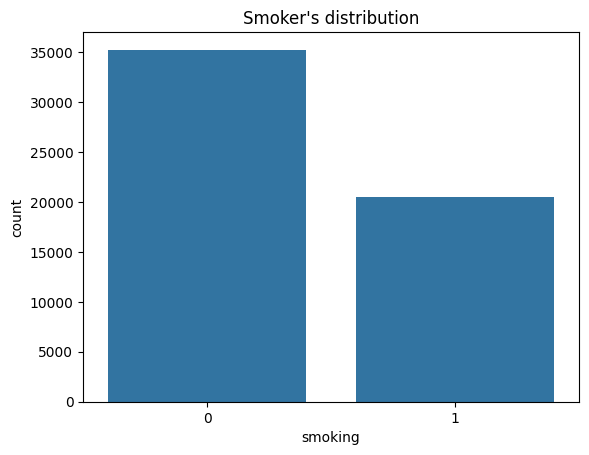

In [11]:
# Plotting the smoker and non-smoker 
# distribution in the given dataset

sns.countplot(x='smoking', data=df)
plt.title('Smoker\'s distribution')


In [12]:
print("Percentage of smoker(1) vs non-smoker(1)\n",round(df['smoking'].value_counts(normalize=True)*100))

Percentage of smoker(1) vs non-smoker(1)
 smoking
0    63.0
1    37.0
Name: proportion, dtype: float64


There are total 63% of non-smokers and 37% of smokers in the given dataset

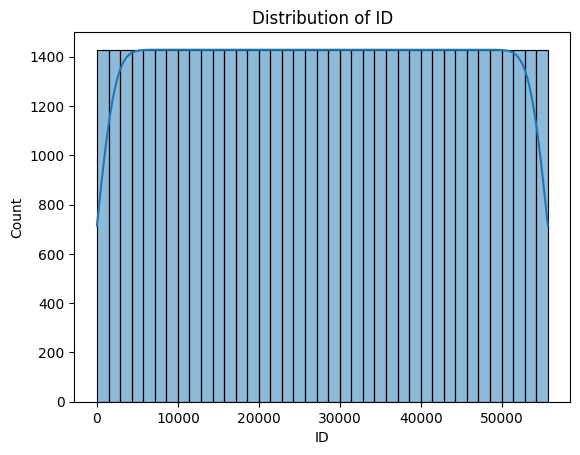

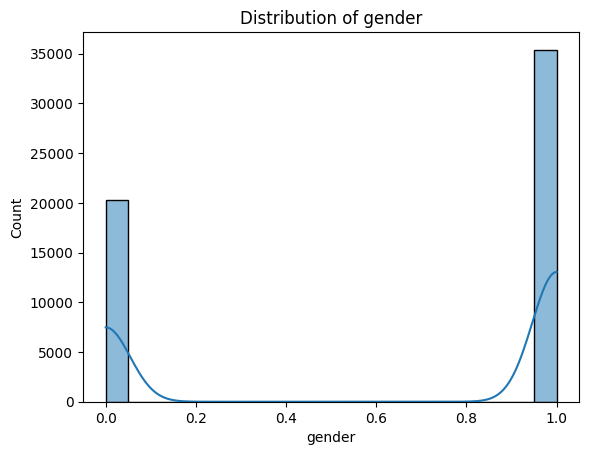

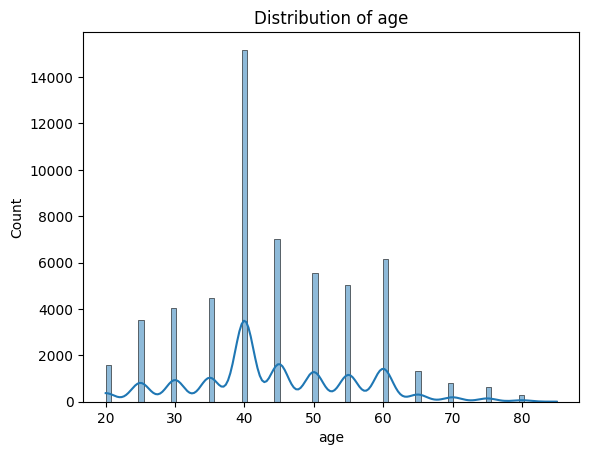

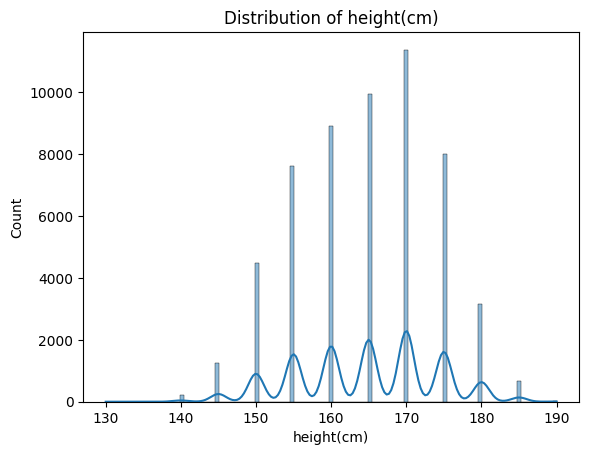

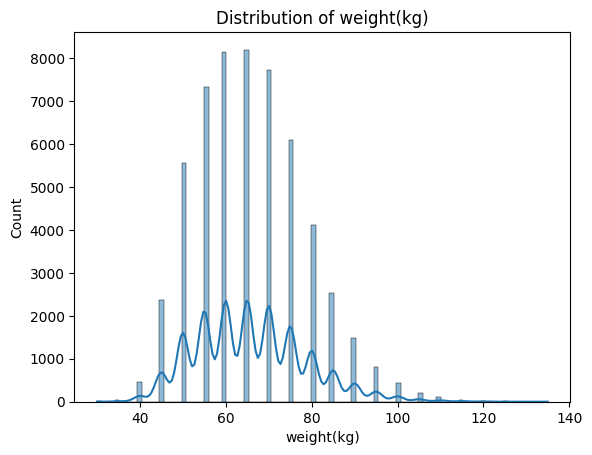

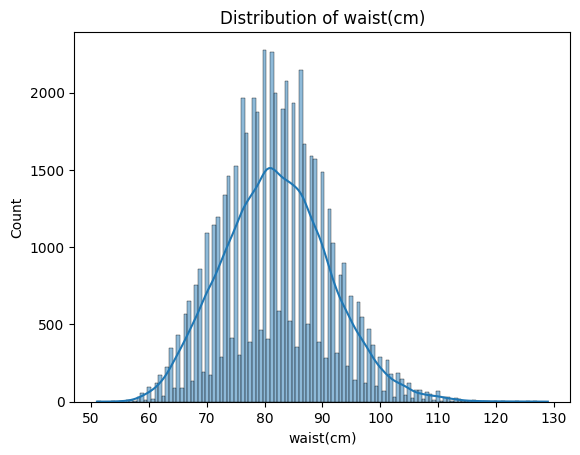

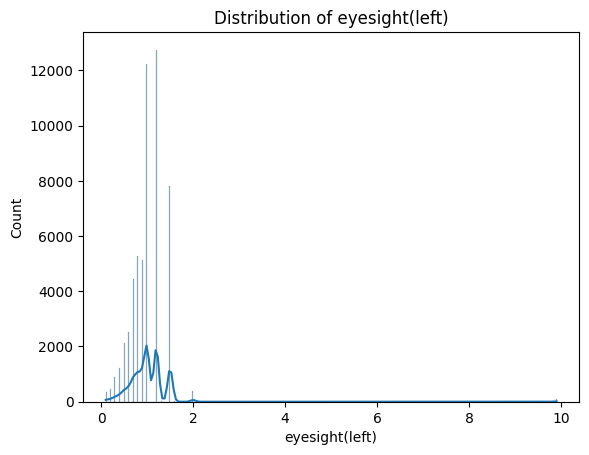

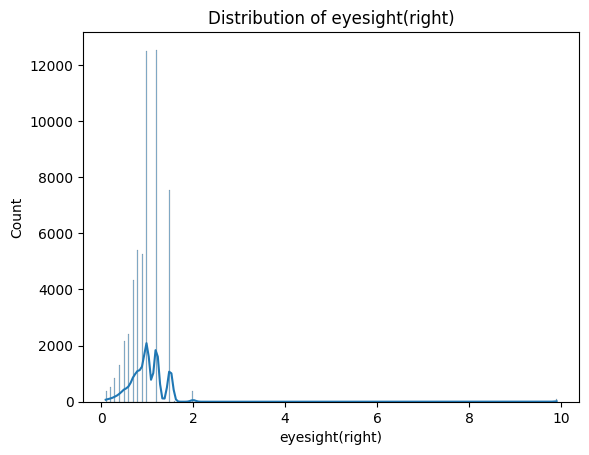

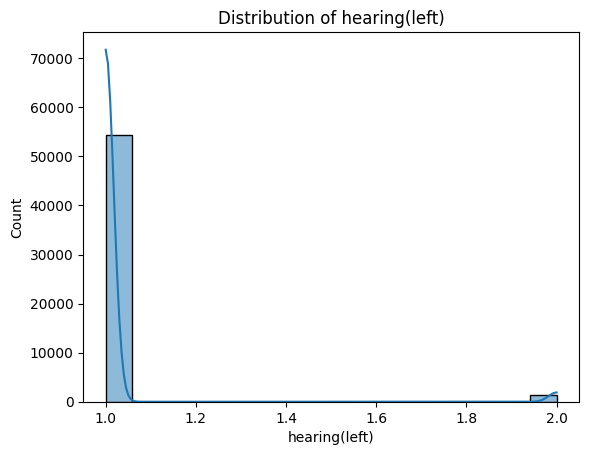

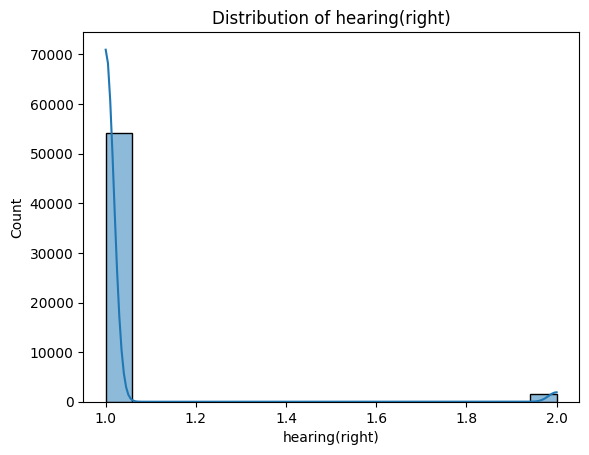

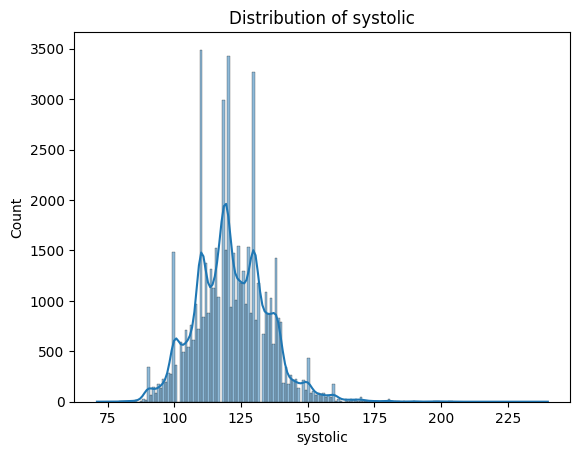

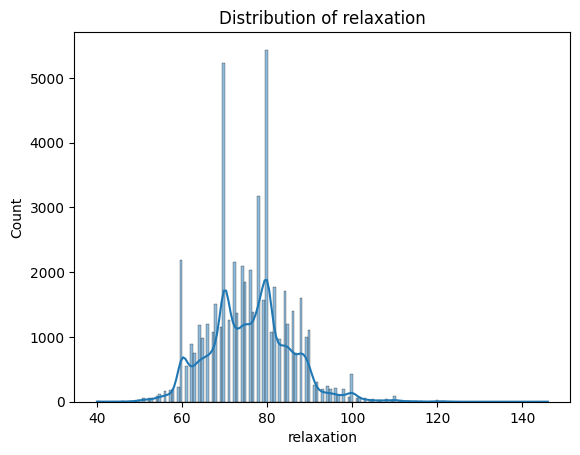

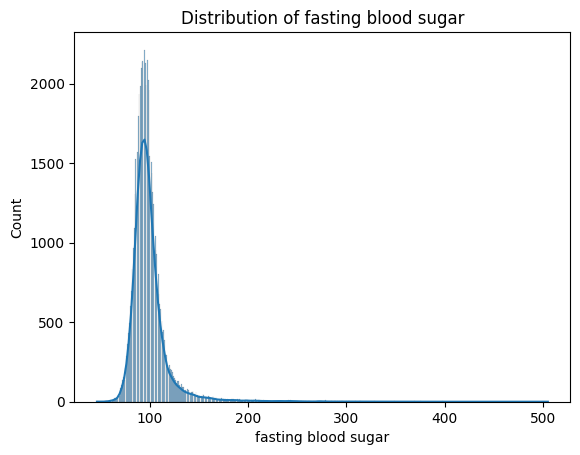

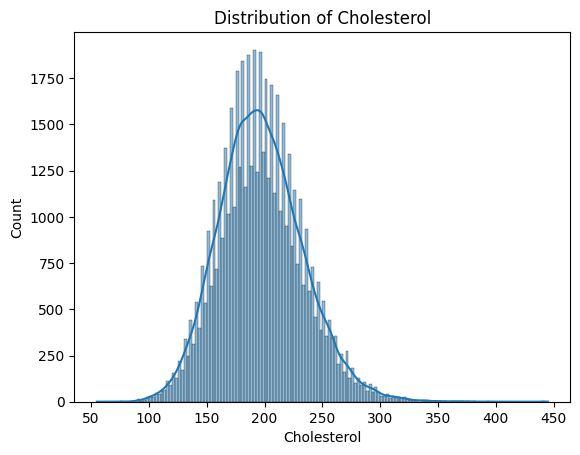

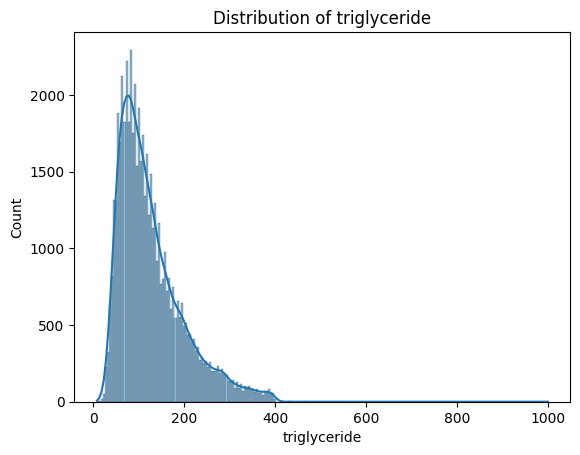

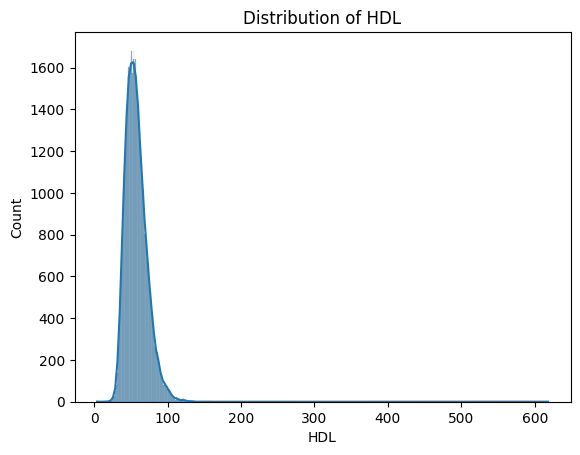

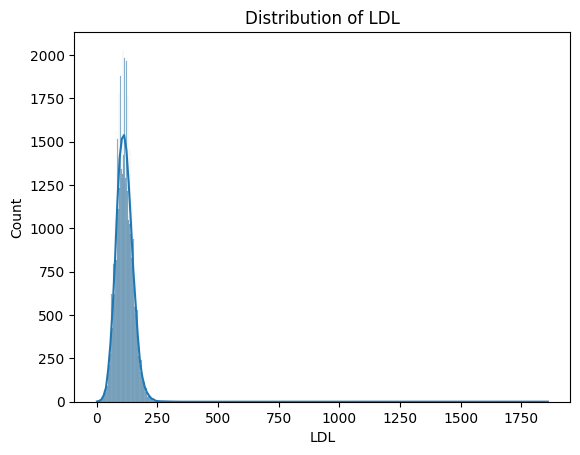

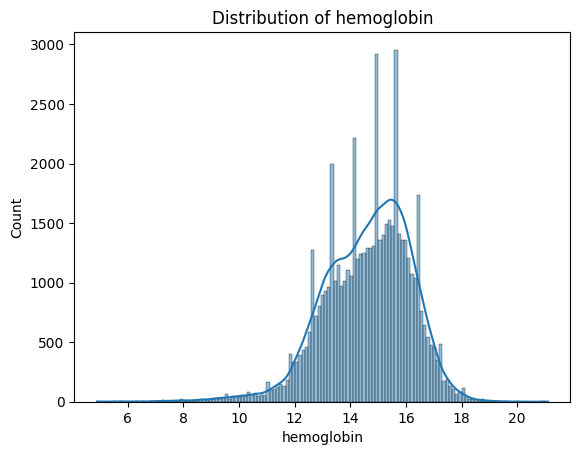

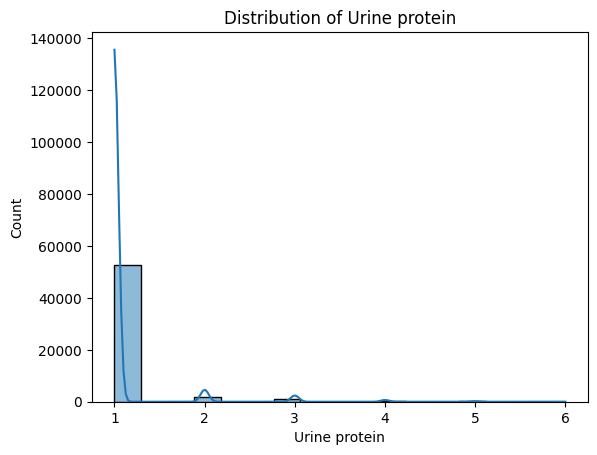

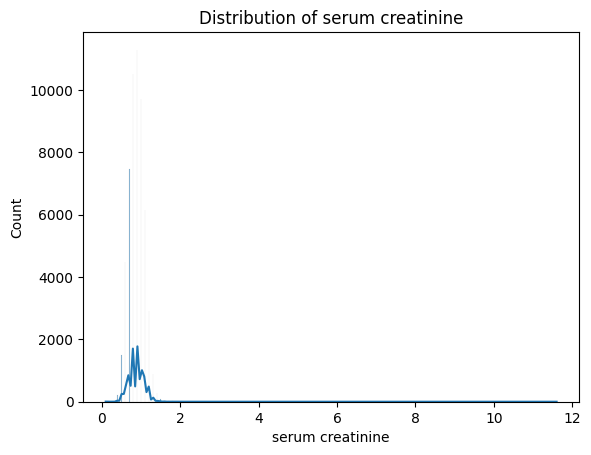

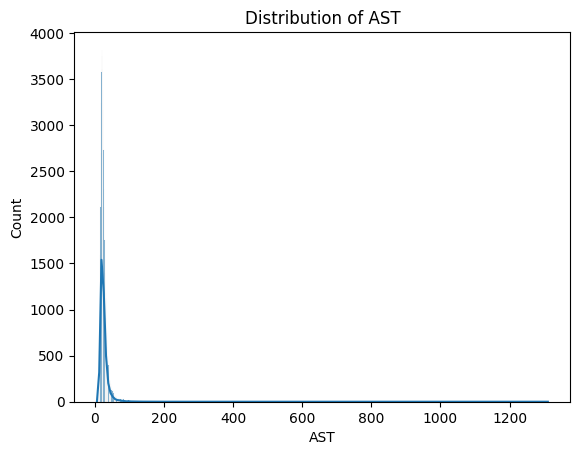

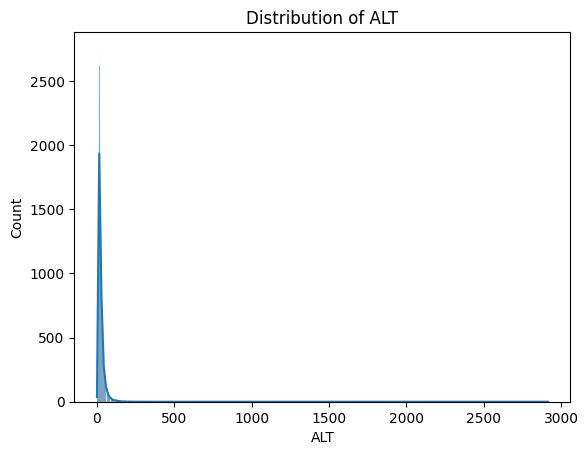

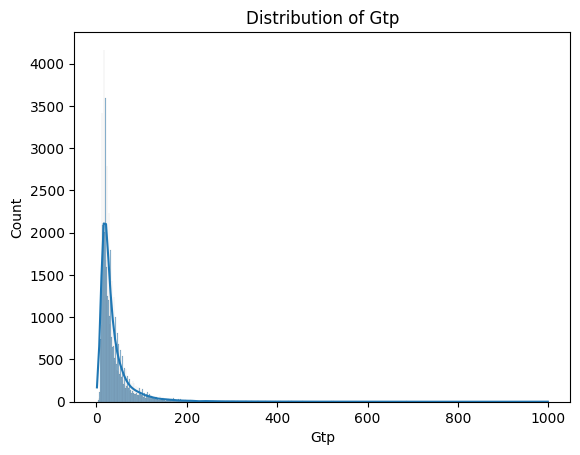

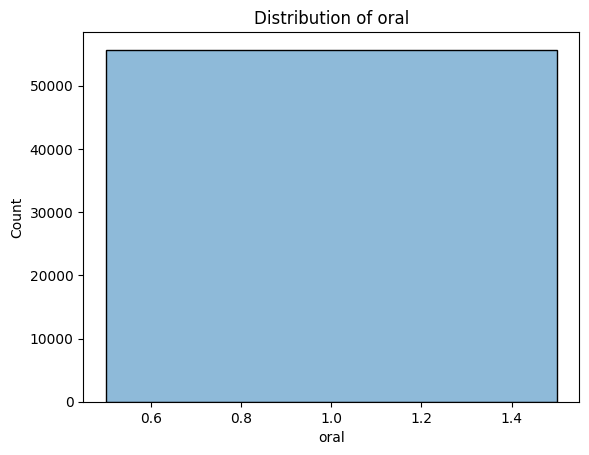

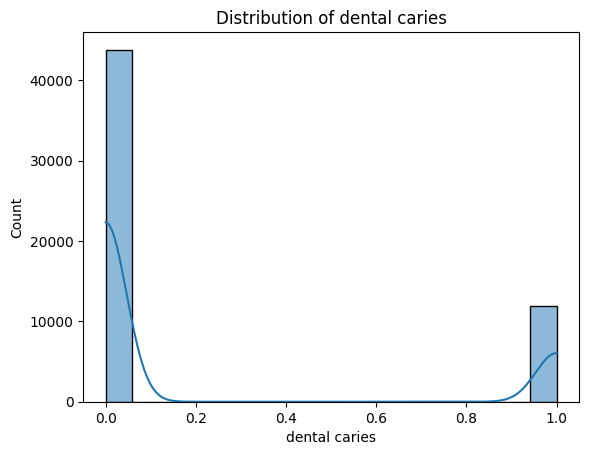

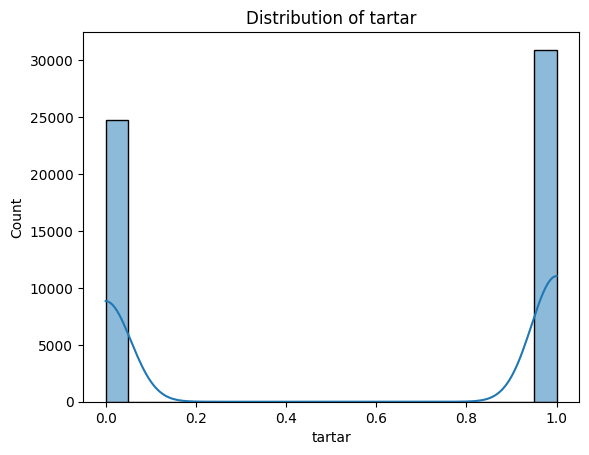

In [13]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns.drop('smoking')

for col in numerical:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### Distribution of Gender:
In this graph we can see that there more number of males as compared to females
females are around: 20000
and males are around: 35000 

### Distribution of age:
In this histogram we can observe that there alot of people belonging to age 40 and people of other ages are distributed alongway, but the peak of age 40 is a max.

### Distribution of Height:
Here people are mostly having height of 170 
ranging from 155 - 170 and other numbers are in different range
170 is at its peak
Reason is people of 40 age are mostly having height of 160-170

### Distribution of weight

### 

In [16]:
# Distribution of Gender (0: Female, 1: Male)
print("### Distribution of Gender:")
print(df['gender'].value_counts().sort_index())

# Distribution of Age (Grouped: 10-20, 20-30, ...)
print("\n### Distribution of Age:")
print(pd.cut(df['age'], bins=np.arange(10, 100, 10), right=False).value_counts().sort_index())

# Distribution of Height (Grouped: 130-135, 135-140, ...)
print("\n### Distribution of Height:")
print(pd.cut(df['height(cm)'], bins=np.arange(130, 200, 5), right=False).value_counts().sort_index())

# Distribution of Weight (Grouped: 40-45, 45-50, ...)
print("\n### Distribution of Weight:")
print(pd.cut(df['weight(kg)'], bins=np.arange(40, 150, 5), right=False).value_counts().sort_index())

# Distribution of Waist
print("\n### Distribution of Waist:")
print(pd.cut(df['waist(cm)'], bins=np.arange(60, 130, 5), right=False).value_counts().sort_index())

# Eyesight (Left)
print("\n### Distribution of Eyesight (Left):")
print(pd.cut(df['eyesight(left)'], bins=np.arange(0, 2.5, 0.2), right=False).value_counts().sort_index())

# Eyesight (Right)
print("\n### Distribution of Eyesight (Right):")
print(pd.cut(df['eyesight(right)'], bins=np.arange(0, 2.5, 0.2), right=False).value_counts().sort_index())

# Systolic BP
print("\n### Distribution of Systolic BP:")
print(pd.cut(df['systolic'], bins=np.arange(80, 200, 10), right=False).value_counts().sort_index())

# Relaxation (Diastolic BP)
print("\n### Distribution of Relaxation BP:")
print(pd.cut(df['relaxation'], bins=np.arange(40, 120, 10), right=False).value_counts().sort_index())

# Cholesterol
print("\n### Distribution of Cholesterol:")
print(pd.cut(df['cholesterol'], bins=np.arange(100, 350, 25), right=False).value_counts().sort_index())

# Weight (Repeated field)
# Skip or ensure 'weight' vs 'weight(kg)' consistency

# Smoking status
print("\n### Distribution of Smoking:")
print(df['smoking'].value_counts().sort_index())


### Distribution of Gender:
gender
0    20291
1    35401
Name: count, dtype: int64

### Distribution of Age:
age
[10, 20)        0
[20, 30)     5130
[30, 40)     8536
[40, 50)    22218
[50, 60)    10569
[60, 70)     7503
[70, 80)     1441
[80, 90)      295
Name: count, dtype: int64

### Distribution of Height:
height(cm)
[130, 135)        1
[135, 140)        6
[140, 145)      205
[145, 150)     1236
[150, 155)     4492
[155, 160)     7627
[160, 165)     8919
[165, 170)     9949
[170, 175)    11381
[175, 180)     8009
[180, 185)     3149
[185, 190)      681
[190, 195)       37
Name: count, dtype: int64

### Distribution of Weight:
weight(kg)
[40, 45)       468
[45, 50)      2370
[50, 55)      5564
[55, 60)      7326
[60, 65)      8139
[65, 70)      8196
[70, 75)      7722
[75, 80)      6088
[80, 85)      4117
[85, 90)      2529
[90, 95)      1477
[95, 100)      816
[100, 105)     436
[105, 110)     200
[110, 115)     113
[115, 120)      49
[120, 125)      23
[125, 130)       8
[130, 135

KeyError: 'cholesterol'